## Векторные представления слов (word embeddings)

In [6]:
!pip install pymystem3

In [5]:
!pip install seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')
random.seed(1228)
pd.set_option('display.max_colwidth', None)

%matplotlib inline

# Векторизация слов из Твиттера


In [2]:
from pymystem3 import Mystem
import re


m = Mystem()


regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""



def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "
words_only('g;iuhoikl 7.kjh 87h одлжд :))')

'g iuhoikl kjh h одлжд :))'

In [3]:
df_pos = pd.read_csv("positive.csv", sep=';', header = None, usecols = [3])
df_pos.tail()

,3
114906,"Спала в родительском доме, на своей кровати... Проснулась с кошкой на голове))"
114907,"RT @jebesilofyt: Эх... Мы немного решили сократить путь, сейчас уже лежу в мягкой кровати :) а с отсутствием сети помогла справится какая-"
114908,"Что происходит со мной, когда в эфире #proactivefm звучит моя любимая песня)) #dctalk #music @… http://t.co/65KGFFd5oO"
114909,"""Любимая,я подарю тебе эту звезду..."" Имя какой звезды переводится ""подмышка""? ;-)"
114910,@Ma_che_rie посмотри #непытайтесьпокинутьомск сегодня в Вавилоне в 18.20. Я там тоже есть :)


In [4]:
df_pos = pd.read_csv("negative.csv", sep=';', header = None, usecols = [3])
df_pos.head()

,3
0,"на работе был полный пиддес :| и так каждое закрытие месяца, я же свихнусь так D:"
1,"Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :("
2,@elina_4post как говорят обещаного три года ждут...((
3,"Желаю хорошего полёта и удачной посадки,я буду очень сильно скучать( http://t.co/jCLNzVNv3S"
4,"Обновил за каким-то лешим surf, теперь не работает простоплеер :("


**Вопрос 1:** Стоит ли удалять пунктуацию на этапе предобработки? Если нет, то почему?

**Вопрос 2:** Лемматизация или стемминг, какой метод лучше выбрать?

In [2]:
df_neg = pd.read_csv("negative.csv", sep=';', header = None, usecols = [3])
df_pos = pd.read_csv("positive.csv", sep=';', header = None, usecols = [3])
df_neg['sent'] = 'neg'
df_pos['sent'] = 'pos'
df_pos['text'] = df_pos[3]
df_neg['text'] = df_neg[3]
df = pd.concat([df_neg, df_pos])
df = df[['text', 'sent']]
%time df.text = df.text.apply(words_only)
#%time df.text = df.text.apply(lemmatize)

NameError: name 'pd' is not defined

Загрузим предобработанные данные. Слова в твитах были лемматизированы и очищены от лишней пунктуации.

In [11]:
# Data load for Windows users
df = pd.read_csv('administrative.csv', index_col = 0)
df.head()

text
label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [5]:
# Data load for Windows users
df = pd.read_csv('processed_text.csv', index_col = 0)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'processed_text.csv'

In [12]:
print(df.shape)
#df.head()

(359, 1)


In [13]:
texts = [df.text.iloc[i].split() for i in range(len(df))]
texts[0]

['арбитражный',
 'суд',
 'республика',
 'татарстан',
 'обратиться',
 'общество',
 'ограниченный',
 'ответственность',
 'торговый',
 'компания',
 'хыять',
 'далее',
 'тк',
 'хыять',
 'истец',
 'иск',
 'общество',
 'ограниченный',
 'ответственность',
 'сервисный',
 'компания',
 'барс',
 'далее',
 'ск',
 'барс',
 'ответчик',
 'взыскание',
 'руб',
 'убыток',
 'исковый',
 'требование',
 'принять',
 'рассмотрение',
 'суд',
 'порядок',
 'упрощённый',
 'производство',
 'исходить',
 'требование',
 'статья',
 'арбитражный',
 'процессуальный',
 'кодекс',
 'российский',
 'федерация',
 'учёт',
 'разъяснение',
 'изложить',
 'постановление',
 'пленум',
 'верховный',
 'суд',
 'российский',
 'федерация',
 'некоторый',
 'вопрос',
 'применение',
 'суд',
 'положение',
 'гражданский',
 'процессуальный',
 'кодекс',
 'российский',
 'федерация',
 'арбитражный',
 'процессуальный',
 'кодекс',
 'российский',
 'федерация',
 'упрощённый',
 'производство',
 'решение',
 'арбитражный',
 'суд',
 'республика',
 'татарс

## Word2Vec модель

Алгоритм Word2Vec реализован в библиотеке `gensim`. Обучение модели - это всего несколько строк кода.



In [27]:
!pip install gensim

In [23]:
!pip install wheel

In [25]:
!pip install setuptools

In [30]:
!pip install scipy==1.11.0

     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------------- -------------------------- 20.5/59.1 kB 640.0 kB/s eta 0:00:01
     ---------------------------------- ----- 51.2/59.1 kB 518.5 kB/s eta 0:00:01
     ---------------------------------------- 59.1/59.1 kB 520.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/43.9 MB 3.2 MB/s eta 0:00:14
   ---------------------------------------- 0.1/43.9 MB 1.4 MB/s eta 0:00:31
   ---------------------------------------- 0.2/43.9 MB 1.5 MB/s eta 0:00:30
   ---------------------------------------- 0.3/43.9 MB 1.6 MB/s eta 0:00:28
   ---------------------------------------- 0.4/43.9 MB 1.6 MB/s eta 0:00:27
   ---------------------------------------- 0.4/43.9 MB 1.6 MB/s eta 0:00:27
   ---------------------------------------- 0.5/43.9 MB 1.6 MB/s eta 0:00:28
    --------------------------------------- 0.6/43.9 MB 1.7 MB/s eta 0:00

Reason for being yanked: License Violation


In [14]:
%%time
from gensim.models import Word2Vec
model = Word2Vec(texts, window=5, min_count=5, workers=4)
model.save("word2v.model")

CPU times: total: 1.48 s
Wall time: 1.6 s


In [15]:
#model = Word2Vec.load("word2v.model") 

Посмотрим на близкие слова.

In [16]:
model.wv.most_similar("исследование")

[('всесторонний', 0.8490644693374634),
 ('оценка', 0.7711940407752991),
 ('правильный', 0.7339797019958496),
 ('допустимость', 0.7318891286849976),
 ('допустимый', 0.6967266798019409),
 ('полно', 0.6941974759101868),
 ('документально', 0.6869794130325317),
 ('основать', 0.6825377941131592),
 ('сопоставлять', 0.6791920065879822),
 ('относимость', 0.6725550889968872)]

In [17]:
model.wv.most_similar("рассмотрение")

[('рассмотреть', 0.7178496718406677),
 ('рассматривать', 0.5549139380455017),
 ('определение', 0.5320879220962524),
 ('возбуждение', 0.5242375135421753),
 ('досудебный', 0.49671122431755066),
 ('существо', 0.4950437545776367),
 ('разбирательство', 0.4848412275314331),
 ('уголовный', 0.48265817761421204),
 ('спор', 0.4801294803619385),
 ('явиться', 0.45858174562454224)]

In [18]:
model.wv.most_similar("отпуск")

[('роды', 0.8491593599319458),
 ('беременность', 0.8472371101379395),
 ('уход', 0.8449664115905762),
 ('временной', 0.8296127915382385),
 ('ребёнок', 0.8242100477218628),
 ('карантин', 0.794886589050293),
 ('нетрудоспособность', 0.7785708904266357),
 ('ежемесячный', 0.7732309103012085),
 ('пособие', 0.7722276449203491),
 ('заработный', 0.7608277201652527)]

In [28]:
vec = (model.wv['гражданский'] - model.wv['рассмотрение'] + model.wv['исследование'])/3
model.wv.similar_by_vector(vec)

[('гражданский', 0.5310301184654236),
 ('товарный', 0.4875865578651428),
 ('оборот', 0.4560634195804596),
 ('ценность', 0.43795594573020935),
 ('вэд', 0.43737873435020447),
 ('экипаж', 0.42876288294792175),
 ('произведение', 0.4277403652667999),
 ('валюта', 0.4262709617614746),
 ('нерезидент', 0.4244418144226074),
 ('тн', 0.4243268668651581)]

In [29]:
vec = (model.wv['лето'] - model.wv['жара'] + model.wv['холод'])/3
model.wv.similar_by_vector(vec)

KeyError: "Key 'лето' not present"

In [30]:
model.wv.doesnt_match("ночь улица фонарь аптека".split())

'аптека'

In [31]:
model.wv.doesnt_match("цветок дерево кактус еда".split())

'дерево'

In [32]:
model.wv.doesnt_match("город время человек халява".split())

'время'

### Визуализация пространства слов 

Возьмем 500 наиболее частотных слов и визуализируем их векторные представления на плоскости с помощью TSNE.

In [19]:
top_words = []
from nltk import FreqDist
fd = FreqDist()
for text in texts:
    fd.update(text)
for i in fd.most_common(500):
    top_words.append(i[0])
print(top_words)

['-', 'суд', 'статья', 'дело', 'административный', 'лицо', 'рф', 'закон', 'российский', 'орган', 'решение', 'федерация', 'арбитражный', 'часть', 'который', 'пункт', 'правонарушение', 'соответствие', 'требование', 'судебный', 'право', 'договор', 'акт', 'основание', 'фио', 'общество', 'федеральный', 'являться', 'заявитель', 'документ', 'государственный', 'иной', 'налоговый', 'установить', 'товар', 'постановление', 'таможенный', 'ответственность', 'заявление', 'далее', 'также', 'срок', 'кодекс', 'ст', 'указанный', 'действие', 'согласно', 'порядок', 'сведение', 'обстоятельство', 'случай', 'деятельность', 'такой', 'апелляционный', 'объект', 'средство', 'представить', 'услуга', 'нарушение', 'коап', 'организация', 'фз', 'материал', 'управление', 'настоящий', 'отношение', 'установленный', 'предусмотреть', 'г', 'работа', 'производство', 'область', 'год', 'апк', 'руб', 'инстанция', 'рассмотрение', 'земельный', 'сумма', 'п', 'участок', 'размер', 'правовой', 'сила', 'учёт', 'исполнение', 'жалоба',

In [20]:
top_words_vec = model.wv[top_words]

In [21]:
top_words_vec.shape

(500, 100)

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [8]:
!pip3 install bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [25]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

### Кластеризация слов 

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

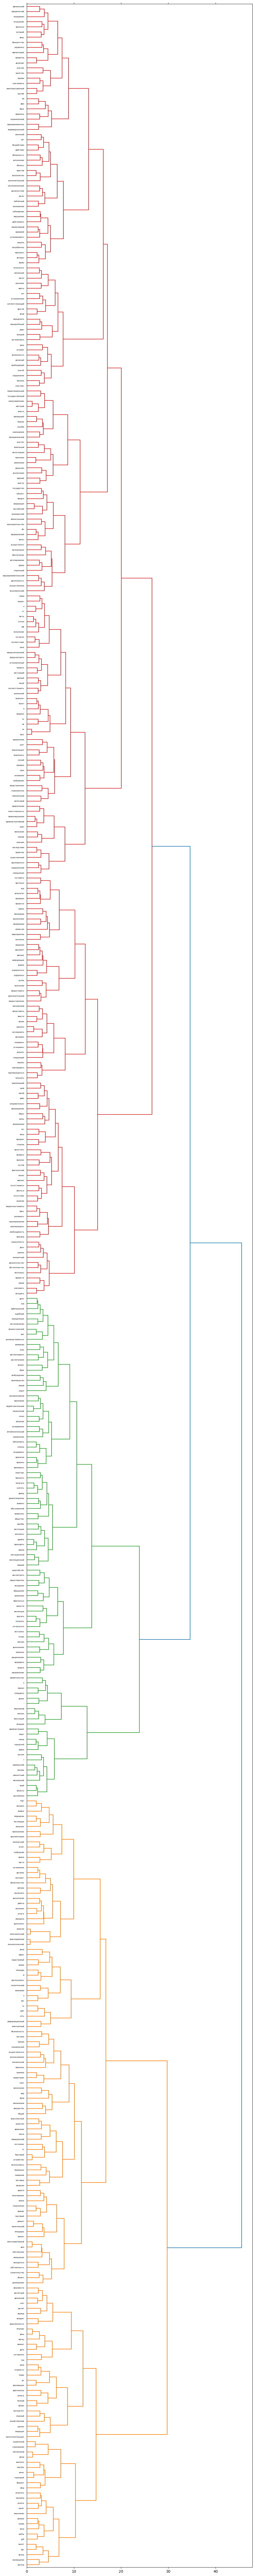

In [27]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

plt.savefig('w2v_cluster.png', dpi=200) #save figure as ward_clusters

## Классификация текстов 
По мотивам [поста](http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/)


# Бонусное задание

 1) зайдите на сайт RusVectores и скачайте одну из предобученных моделей gensim: https://rusvectores.org/ru/models/ 
 
2) Проведите аналогичные эксперименты с использованием скачанных векторных представлений

Как изменился результат?

In [35]:
# !"C:\Program Files (x86)\GnuWin32\bin\wget.exe" --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2024-06-03 18:55:46--  http://nlp.stanford.edu/data/glove.6B.zip
Распознаётся nlp.stanford.edu... 171.64.67.140
Устанавливается соединение с nlp.stanford.edu|171.64.67.140|:80... соединение установлено.
Запрос HTTP послан, ожидается ответ... 302 Found
Адрес: https://nlp.stanford.edu/data/glove.6B.zip [переход]
--2024-06-03 18:55:49--  https://nlp.stanford.edu/data/glove.6B.zip
Устанавливается соединение с nlp.stanford.edu|171.64.67.140|:443... соединение установлено.
ПРЕДУПРЕЖДЕНИЕ: невозможно проверить сертификат nlp.stanford.edu, запрошенный `/C=US/ST=MI/L=Ann Arbor/O=Internet2/OU=InCommon/CN=InCommon RSA Server CA':
  Обнаружен самостоятельно подписанный сертификат.
Запрос HTTP послан, ожидается ответ... 301 Moved Permanently
Адрес: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [переход]
--2024-06-03 18:55:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Распоз

In [40]:
with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
           for line in lines}
w2v    

{b'the': array(<map object at 0x000001E85439D120>, dtype=object),
 b',': array(<map object at 0x000001E85439E050>, dtype=object),
 b'.': array(<map object at 0x000001E85439EAA0>, dtype=object),
 b'of': array(<map object at 0x000001E85439F490>, dtype=object),
 b'to': array(<map object at 0x000001E85439FE80>, dtype=object),
 b'and': array(<map object at 0x000001E8543C88B0>, dtype=object),
 b'in': array(<map object at 0x000001E8543C92A0>, dtype=object),
 b'a': array(<map object at 0x000001E8543C9C60>, dtype=object),
 b'"': array(<map object at 0x000001E8543CA620>, dtype=object),
 b"'s": array(<map object at 0x000001E8543CB010>, dtype=object),
 b'for': array(<map object at 0x000001E8543CBA00>, dtype=object),
 b'-': array(<map object at 0x000001E8543D4400>, dtype=object),
 b'that': array(<map object at 0x000001E8543D4DF0>, dtype=object),
 b'on': array(<map object at 0x000001E8543D57E0>, dtype=object),
 b'is': array(<map object at 0x000001E8543D61D0>, dtype=object),
 b'was': array(<map objec

In [51]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.values())
        

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [52]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.values())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])

In [59]:
X = [['Berlin', 'London'],
     ['cow', 'cat'],
     ['pink', 'yellow']]
y = ['capitals', 'animals', 'colors']
etree_w2v.fit(X, y)

# never before seen words!!!
test_X = [['dog'], ['red'], ['Madrid']]

print (etree_w2v.predict(test_X))

['animals' 'animals' 'animals']
